In [1]:
import pandas as pd
from datetime import datetime
import os
pd.set_option('display.max_columns', None)
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.metrics import accuracy_score, precision_score, precision_recall_curve, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from python_scripts.model_performance import generate_df_summary, predict_max_f1
# import feature data types
import json
with open('python_scripts/data_types.json') as f:
    data_types = json.load(f) 

## Baseline Model

In [2]:
X_train = pd.read_csv('data/X_train.csv')
y_train = pd.read_csv('data/y_train.csv')
X_val = pd.read_csv('data/X_val.csv')
y_val = pd.read_csv('data/y_val.csv')

In [3]:
baseline_model = XGBClassifier(
    eval_metric='auc',
    random_state=0
)

baseline_model.fit(X_train, y_train)
y_pred = baseline_model.predict(X_val)

generate_df_summary(baseline_model, y_val, y_pred, 'baseline model')

: 

: 

In [6]:
y_pred, best_threshold = predict_max_f1(baseline_model, X_val, y_val)
generate_df_summary(baseline_model, y_val, y_pred, 'baseline model threshold optimised', threshold=best_threshold)

Precision: 0.19
Recall: 0.26
F1-Score: 0.22

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        105155          1563
True Class 1          1076           374


## Resampled datasets

In [4]:
X_train_resampled_10 = pd.read_csv('data/resampled/X_train_10.csv')
y_train_resampled_10 = pd.read_csv('data/resampled/y_train_10.csv')

X_train_resampled_25 = pd.read_csv('data/resampled/X_train_25.csv')
y_train_resampled_25 = pd.read_csv('data/resampled/y_train_25.csv')

X_train_resampled_50 = pd.read_csv('data/resampled/X_train_50.csv')
y_train_resampled_50 = pd.read_csv('data/resampled/y_train_50.csv')

X_train_resampled_100 = pd.read_csv('data/resampled/X_train_100.csv')
y_train_resampled_100 = pd.read_csv('data/resampled/y_train_100.csv')

### 10:1 resampling ratio

In [8]:
baseline_model_10 = XGBClassifier(
    eval_metric='auc',
    random_state=0
)

baseline_model_10.fit(X_train_resampled_10, y_train_resampled_10)
y_pred = baseline_model_10.predict(X_val)
generate_df_summary(baseline_model_10, y_val, y_pred, 'baseline model with 10:1 resampling')

Precision: 0.39
Recall: 0.05
F1-Score: 0.08

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        106612           106
True Class 1          1383            67


In [9]:
y_pred, best_threshold = predict_max_f1(baseline_model_10, X_val, y_val)
generate_df_summary(baseline_model_10, y_val, y_pred, 'baseline model with 10:1 resampling threshold optimised', threshold=best_threshold)

Precision: 0.18
Recall: 0.31
F1-Score: 0.23

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        104682          2036
True Class 1          1007           443


### 4:1 resampling ratio

In [10]:
baseline_model_25 = XGBClassifier(
    eval_metric='auc',
    random_state=0
)

baseline_model_25.fit(X_train_resampled_25, y_train_resampled_25)
y_pred = baseline_model_25.predict(X_val)
generate_df_summary(baseline_model_25, y_val, y_pred, 'baseline model with 4:1 resampling')

Precision: 0.3
Recall: 0.08
F1-Score: 0.13

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        106447           271
True Class 1          1333           117


In [11]:
y_pred, best_threshold = predict_max_f1(baseline_model_25, X_val, y_val)
generate_df_summary(baseline_model_25, y_val, y_pred, 'baseline model with 4:1 resampling threshold optimised', threshold=best_threshold)

Precision: 0.17
Recall: 0.3
F1-Score: 0.22

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        104591          2127
True Class 1          1018           432


### 2:1 resampling ratio

In [12]:
baseline_model_50 = XGBClassifier(
    eval_metric='auc',
    random_state=0
)

baseline_model_50.fit(X_train_resampled_50, y_train_resampled_50)
y_pred = baseline_model_50.predict(X_val)
generate_df_summary(baseline_model_50, y_val, y_pred, 'baseline model with 2:1 resampling')

Precision: 0.27
Recall: 0.1
F1-Score: 0.14

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        106330           388
True Class 1          1307           143


In [13]:
y_pred, best_threshold = predict_max_f1(baseline_model_50, X_val, y_val)
generate_df_summary(baseline_model_50, y_val, y_pred, 'baseline model with 2:1 resampling threshold optimised', threshold=best_threshold)

Precision: 0.16
Recall: 0.3
F1-Score: 0.21

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0        104548          2170
True Class 1          1022           428


### 1:1 resampling ratio

In [5]:
baseline_model_100 = XGBClassifier(
    eval_metric='auc',
    random_state=0
)

baseline_model_100.fit(X_train_resampled_100, y_train_resampled_100)
y_pred = baseline_model_100.predict(X_val)
generate_df_summary(baseline_model_50, y_val, y_pred, 'baseline model with 1:1 resampling')

: 

: 

In [ ]:
y_pred, best_threshold = predict_max_f1(baseline_model_100, X_val, y_val)
generate_df_summary(baseline_model_100, y_val, y_pred, 'baseline model with 1:1 resampling threshold optimised', threshold=best_threshold)

### Comparing baseline model performance

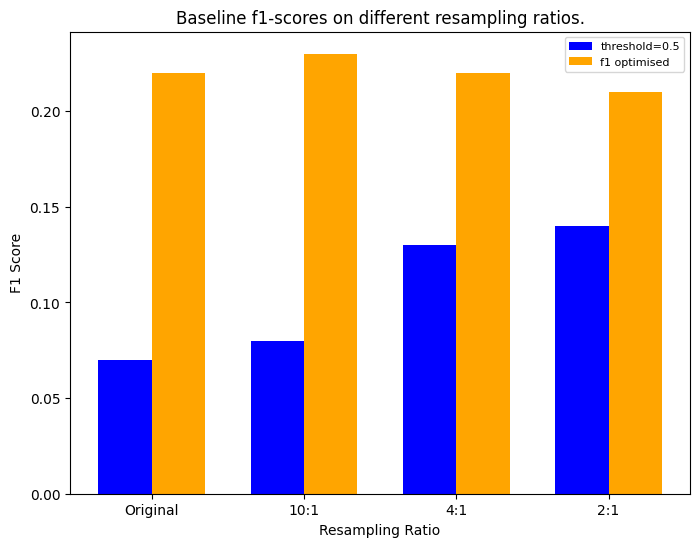

In [25]:
mp_df = pd.read_csv('output/model_performance.csv')

ratios = ['Original', '10:1', '4:1', '2:1', '1:1']
f1s = mp_df['F1-Score'][::2].values[:5]
f1s_optimised = mp_df['F1-Score'][1::2].values[:5]

bar_width = 0.35  
x = np.arange(len(ratios)) 

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width/2, f1s, bar_width, label='threshold=0.5', color='blue')
plt.bar(x + bar_width/2, f1s_optimised, bar_width, label='f1 optimised', color='orange')
plt.xlabel('Resampling Ratio')
plt.ylabel('F1 Score')
plt.title('Baseline f1-scores on different resampling ratios.')
plt.xticks(ticks=x, labels=ratios) 
plt.legend(fontsize=8)
plt.show()


## Hyper parameter tuning

not used in tuning, will add in if there appears to be over fitting, these use samples of the whole training data in each base tree:
- subsample (0-1)
- colsample_bytree (0-1)



### Deep dive with more combinations and WITHOUT smote, using xgboost inbuild scale_pos_weight parameter

In [106]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='auc'
)

# set scale_pos_weight values
scale_pos_weight_1 = (len(y_train) - y_train.fraud_bool.sum()) / y_train.fraud_bool.sum()
scale_pos_weight_2 = np.sqrt((len(y_train) - y_train.fraud_bool.sum()) / y_train.fraud_bool.sum())
scale_pos_weight_3 = np.mean([scale_pos_weight_1, scale_pos_weight_2])

# Define the hyperparameters to search
param_dist = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'reg_lambda': [0, 0.1, 1, 10, 100], #l2
    'reg_alpha': [0, 0.1, 1, 10, 100],  # l1
    'n_estimators': [1000],
    'early_stopping_rounds': [15],
    'scale_pos_weight': [scale_pos_weight_1, scale_pos_weight_2],
    'max_delta_step': [0, 1, 5, 10],
    'gamma': [0, 0.1, 0.5, 1, 2]
}

# RandomizedSearchCV setup for parameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20, 
    scoring='average_precision',  
    cv=3,  
    verbose=0,  
    random_state=0
)

# Fit the model (train and tune hyperparameters)
random_search.fit(X_train, y_train, 
                  eval_set=[(X_val, y_val)])

# Get the best model and print the results
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

[0]	validation_0-aucpr:0.04177
[1]	validation_0-aucpr:0.04915
[2]	validation_0-aucpr:0.05703
[3]	validation_0-aucpr:0.06233
[4]	validation_0-aucpr:0.06968
[5]	validation_0-aucpr:0.07510
[6]	validation_0-aucpr:0.07815
[7]	validation_0-aucpr:0.08179
[8]	validation_0-aucpr:0.08734
[9]	validation_0-aucpr:0.09158
[10]	validation_0-aucpr:0.09570
[11]	validation_0-aucpr:0.09598
[12]	validation_0-aucpr:0.09724
[13]	validation_0-aucpr:0.09956
[14]	validation_0-aucpr:0.10592
[15]	validation_0-aucpr:0.10586
[16]	validation_0-aucpr:0.11251
[17]	validation_0-aucpr:0.11415
[18]	validation_0-aucpr:0.11430
[19]	validation_0-aucpr:0.11564
[20]	validation_0-aucpr:0.11939
[21]	validation_0-aucpr:0.12094
[22]	validation_0-aucpr:0.12166
[23]	validation_0-aucpr:0.12221
[24]	validation_0-aucpr:0.12324
[25]	validation_0-aucpr:0.12691
[26]	validation_0-aucpr:0.12667
[27]	validation_0-aucpr:0.13025
[28]	validation_0-aucpr:0.13021
[29]	validation_0-aucpr:0.13139
[30]	validation_0-aucpr:0.13327
[31]	validation_0-

In [107]:
generate_df_summary(best_model, y_test, y_pred, 'randomized search no smote')

Precision: 0.23
Recall: 0.23
F1-Score: 0.23

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0         98082           832
True Class 1           832           254


In [108]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.sort_values('rank_test_score', ascending=True).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scale_pos_weight,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_max_delta_step,param_learning_rate,param_gamma,param_early_stopping_rounds,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,33.287999,1.237557,0.752271,0.018682,9.46574,0.1,0.1,1000,1,3,10,0.08,0.1,15,"{'scale_pos_weight': 9.465739617196654, 'reg_l...",0.166116,0.156494,0.171890,0.164834,0.006351,1
1,37.210677,4.840735,1.160593,0.125078,9.46574,0.1,100.0,1000,3,5,10,0.09,0.0,15,"{'scale_pos_weight': 9.465739617196654, 'reg_l...",0.165037,0.154493,0.173063,0.164197,0.007604,2
2,54.927056,2.706943,1.217302,0.067382,9.46574,0.0,1.0,1000,3,3,5,0.04,1.0,15,"{'scale_pos_weight': 9.465739617196654, 'reg_l...",0.165766,0.155262,0.171104,0.164044,0.006581,3
3,33.155063,1.688502,1.093446,0.105184,9.46574,0.0,100.0,1000,5,5,0,0.10,0.1,15,"{'scale_pos_weight': 9.465739617196654, 'reg_l...",0.165332,0.153536,0.170613,0.163160,0.007139,4
4,34.701442,2.996644,0.975393,0.186094,9.46574,100.0,10.0,1000,5,5,0,0.08,0.0,15,"{'scale_pos_weight': 9.465739617196654, 'reg_l...",0.163906,0.153021,0.171097,0.162675,0.007431,5


### Deep dive this time using SMOTE data sets

In [109]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='aucpr',
)

# Define the hyperparameters to search
param_dist = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'reg_lambda': [0, 0.1, 1, 10, 100], #l2
    'reg_alpha': [0, 0.1, 1, 10, 100],  # l1
    'n_estimators': [1000],
    'early_stopping_rounds': [15],
    # 'scale_pos_weight': [scale_pos_weight_1], #only using 1 for now
    'max_delta_step': [0, 1, 5, 10],
    'gamma': [0, 0.1, 0.5, 1, 2]
}

# RandomizedSearchCV setup for parameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20, 
    scoring='average_precision',  
    cv=3,  
    verbose=1,  
    random_state=0
)

# Fit the model (train and tune hyperparameters)
random_search.fit(X_train_resampled, y_train_resampled, 
                  eval_set=[(X_val, y_val)])

# Get the best model and print the results
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[0]	validation_0-aucpr:0.02836
[1]	validation_0-aucpr:0.02836
[2]	validation_0-aucpr:0.02836
[3]	validation_0-aucpr:0.02836
[4]	validation_0-aucpr:0.03258
[5]	validation_0-aucpr:0.03246
[6]	validation_0-aucpr:0.03946
[7]	validation_0-aucpr:0.03886
[8]	validation_0-aucpr:0.03974
[9]	validation_0-aucpr:0.03971
[10]	validation_0-aucpr:0.03906
[11]	validation_0-aucpr:0.03908
[12]	validation_0-aucpr:0.03956
[13]	validation_0-aucpr:0.03978
[14]	validation_0-aucpr:0.03983
[15]	validation_0-aucpr:0.04395
[16]	validation_0-aucpr:0.04417
[17]	validation_0-aucpr:0.04497
[18]	validation_0-aucpr:0.04560
[19]	validation_0-aucpr:0.04583
[20]	validation_0-aucpr:0.05069
[21]	validation_0-aucpr:0.05101
[22]	validation_0-aucpr:0.05169
[23]	validation_0-aucpr:0.05853
[24]	validation_0-aucpr:0.06599
[25]	validation_0-aucpr:0.06671
[26]	validation_0-aucpr:0.06683
[27]	validation_0-aucpr:0.06669
[28]	validation_0-aucpr:0.06782
[29]	validation_0-auc

In [110]:
generate_df_summary(best_model, y_test, y_pred, 'randomized search with smote')

Precision: 0.11
Recall: 0.34
F1-Score: 0.16

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0         95814          3100
True Class 1           722           364


In [111]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.sort_values('rank_test_score', ascending=True).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_max_delta_step,param_learning_rate,param_gamma,param_early_stopping_rounds,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.582322,16.993517,1.873712,1.029249,0.1,10.0,1000,5,9,0,0.09,1.0,15,"{'reg_lambda': 0.1, 'reg_alpha': 10, 'n_estima...",0.993460,0.997428,0.999841,0.996910,0.002631,1
1,39.390968,11.819427,2.239671,0.541970,100.0,1.0,1000,5,9,0,0.05,0.1,15,"{'reg_lambda': 100, 'reg_alpha': 1, 'n_estimat...",0.992661,0.999079,0.995890,0.995877,0.002620,2
2,45.724850,1.688618,2.686450,0.178741,0.0,0.0,1000,3,9,0,0.03,0.1,15,"{'reg_lambda': 0, 'reg_alpha': 0, 'n_estimator...",0.993376,0.996694,0.997142,0.995737,0.001680,3
3,21.092535,0.457191,1.225634,0.093066,10.0,10.0,1000,1,9,5,0.08,0.1,15,"{'reg_lambda': 10, 'reg_alpha': 10, 'n_estimat...",0.992983,0.996061,0.996436,0.995160,0.001547,4
4,26.687906,4.170709,1.557158,0.156955,10.0,10.0,1000,5,9,10,0.05,1.0,15,"{'reg_lambda': 10, 'reg_alpha': 10, 'n_estimat...",0.992262,0.996886,0.991679,0.993609,0.002329,5


### modifications:
- Using balanced dataset with SMOTE and experimenting with some small values of `scale_pos_weight`
- Adjusting param_dist (see comments)

In [112]:
np.linspace(0.01, 0.25, 13)

array([0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13, 0.15, 0.17, 0.19, 0.21,
       0.23, 0.25])

In [113]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='aucpr'
)

# set scale_pos_weight values
scale_pos_weight_1 = (len(y_train) - y_train.fraud_bool.sum()) / y_train.fraud_bool.sum()
scale_pos_weight_2 = np.sqrt((len(y_train) - y_train.fraud_bool.sum()) / y_train.fraud_bool.sum())
scale_pos_weight_3 = np.mean([scale_pos_weight_1, scale_pos_weight_2])
scale_pos_weight_4 = scale_pos_weight_2 / 2

# Define the hyperparameters to search
param_dist = {
    'learning_rate': np.linspace(0.01, 0.25, 13), # wider range
    'max_depth': [3, 5, 7, 9, 11], # added 11
    'min_child_weight': [1, 3, 5, 7], # added 7
    'reg_lambda': [0, 0.1, 1, 10, 100, 200], #l2 added 200
    'reg_alpha': [0, 0.1, 1, 10, 100, 200],  # l1 added 200
    'n_estimators': [1000],
    'early_stopping_rounds': [15],
    'scale_pos_weight': [scale_pos_weight_2, scale_pos_weight_4, 1], # ~[9, 4.5, 1]
    'max_delta_step': [0, 1, 5, 10, 20], # added 20
    'gamma': [0, 0.1, 0.5, 1, 2, 5, 10] # wider range
}

# RandomizedSearchCV setup for parameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=35, 
    scoring='average_precision',  
    cv=3,  
    verbose=0,  
    random_state=0
)

# Fit the model (train and tune hyperparameters)
random_search.fit(X_train_resampled, y_train_resampled, 
                  eval_set=[(X_val, y_val)])

# Get the best model and print the results
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

[0]	validation_0-aucpr:0.03515
[1]	validation_0-aucpr:0.03556
[2]	validation_0-aucpr:0.03594
[3]	validation_0-aucpr:0.03814
[4]	validation_0-aucpr:0.05237
[5]	validation_0-aucpr:0.05275
[6]	validation_0-aucpr:0.05710
[7]	validation_0-aucpr:0.06336
[8]	validation_0-aucpr:0.06363
[9]	validation_0-aucpr:0.06614
[10]	validation_0-aucpr:0.06710
[11]	validation_0-aucpr:0.06667
[12]	validation_0-aucpr:0.06656
[13]	validation_0-aucpr:0.06767
[14]	validation_0-aucpr:0.06749
[15]	validation_0-aucpr:0.06751
[16]	validation_0-aucpr:0.06631
[17]	validation_0-aucpr:0.06718
[18]	validation_0-aucpr:0.06779
[19]	validation_0-aucpr:0.06781
[20]	validation_0-aucpr:0.07645
[21]	validation_0-aucpr:0.07568
[22]	validation_0-aucpr:0.07742
[23]	validation_0-aucpr:0.07771
[24]	validation_0-aucpr:0.07845
[25]	validation_0-aucpr:0.07895
[26]	validation_0-aucpr:0.07944
[27]	validation_0-aucpr:0.08005
[28]	validation_0-aucpr:0.08028
[29]	validation_0-aucpr:0.08100
[30]	validation_0-aucpr:0.08122
[31]	validation_0-

In [114]:
generate_df_summary(best_model, y_test, y_pred, 'randomized search with smote and scale_pos_weight')

Precision: 0.11
Recall: 0.33
F1-Score: 0.16

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0         95965          2949
True Class 1           724           362


In [121]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.sort_values('rank_test_score', ascending=True).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scale_pos_weight,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_max_delta_step,param_learning_rate,param_gamma,param_early_stopping_rounds,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,48.729103,18.698238,3.225657,1.327919,4.73287,10.0,10.0,1000,5,11,20,0.07,5.0,15,"{'scale_pos_weight': 4.732869808598327, 'reg_l...",0.994729,0.999658,0.999889,0.998092,0.002380,1
1,38.834364,14.624087,2.505367,1.122468,4.73287,0.0,0.0,1000,5,11,0,0.09,2.0,15,"{'scale_pos_weight': 4.732869808598327, 'reg_l...",0.994286,0.999915,0.999816,0.998006,0.002630,2
2,65.763969,23.645770,3.985125,1.498074,9.46574,0.0,200.0,1000,3,11,0,0.07,5.0,15,"{'scale_pos_weight': 9.465739617196654, 'reg_l...",0.994485,0.999645,0.999681,0.997937,0.002441,3
3,65.295507,25.118320,4.556179,1.884014,4.73287,10.0,0.1,1000,3,11,10,0.05,0.5,15,"{'scale_pos_weight': 4.732869808598327, 'reg_l...",0.993532,0.999863,0.999872,0.997756,0.002986,4
4,87.656183,42.259751,5.955769,3.149138,4.73287,200.0,1.0,1000,7,11,10,0.05,0.1,15,"{'scale_pos_weight': 4.732869808598327, 'reg_l...",0.993319,0.999700,0.999857,0.997625,0.003046,5


### modifications:
- Using reduced balanced dataset with SMOTE now using ratio of 10:1 negative:positive fraud combined with `scale_pos_weight`
- Adjusting param_dist (see comments)

In [122]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='aucpr'
)

# Define the hyperparameters to search
param_dist = {
    'learning_rate': np.linspace(0.01, 0.25, 13), # wider range
    'max_depth': [3, 5, 7, 9, 11], # added 11
    'min_child_weight': [1, 3, 5, 7], # added 7
    'reg_lambda': [0, 0.1, 1, 10, 100, 200], #l2 added 200
    'reg_alpha': [0, 0.1, 1, 10, 100, 200],  # l1 added 200
    'n_estimators': [1000],
    'early_stopping_rounds': [15],
    'scale_pos_weight': [5, 10, 20, 30],
    'max_delta_step': [0, 1, 5, 10, 20], # added 20
    'gamma': [0, 0.1, 0.5, 1, 2, 5, 10] # wider range
}

# RandomizedSearchCV setup for parameter tuning
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=35, 
    scoring='average_precision',  
    cv=3,  
    verbose=0,  
    random_state=0
)

# Fit the model (train and tune hyperparameters)
random_search.fit(X_train_resampled, y_train_resampled, 
                  eval_set=[(X_val, y_val)])

# Get the best model and print the results
best_model = random_search.best_estimator_

# Predictions and evaluation
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

[0]	validation_0-aucpr:0.02014
[1]	validation_0-aucpr:0.02015
[2]	validation_0-aucpr:0.02147
[3]	validation_0-aucpr:0.02159
[4]	validation_0-aucpr:0.02146
[5]	validation_0-aucpr:0.02672
[6]	validation_0-aucpr:0.03264
[7]	validation_0-aucpr:0.04903
[8]	validation_0-aucpr:0.04836
[9]	validation_0-aucpr:0.04948
[10]	validation_0-aucpr:0.05410
[11]	validation_0-aucpr:0.06350
[12]	validation_0-aucpr:0.07231
[13]	validation_0-aucpr:0.07466
[14]	validation_0-aucpr:0.07391
[15]	validation_0-aucpr:0.07454
[16]	validation_0-aucpr:0.07596
[17]	validation_0-aucpr:0.07726
[18]	validation_0-aucpr:0.07744
[19]	validation_0-aucpr:0.07835
[20]	validation_0-aucpr:0.08467
[21]	validation_0-aucpr:0.08560
[22]	validation_0-aucpr:0.08475
[23]	validation_0-aucpr:0.08467
[24]	validation_0-aucpr:0.08596
[25]	validation_0-aucpr:0.08635
[26]	validation_0-aucpr:0.08747
[27]	validation_0-aucpr:0.09066
[28]	validation_0-aucpr:0.09293
[29]	validation_0-aucpr:0.09149
[30]	validation_0-aucpr:0.09208
[31]	validation_0-

In [123]:
generate_df_summary(best_model, y_test, y_pred, 'randomized search with smote and scale_pos_weight')

Precision: 0.1
Recall: 0.36
F1-Score: 0.16

Confusion Matrix:

               Pred Class 0  Pred Class 1
True Class 0         95606          3308
True Class 1           699           387


In [124]:
results_df = pd.DataFrame(random_search.cv_results_)
results_df.sort_values('rank_test_score', ascending=True).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scale_pos_weight,param_reg_lambda,param_reg_alpha,param_n_estimators,param_min_child_weight,param_max_depth,param_max_delta_step,param_learning_rate,param_gamma,param_early_stopping_rounds,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,32.980933,6.808247,2.173321,0.448342,10,10.0,1.0,1000,3,11,0,0.11,5.0,15,"{'scale_pos_weight': 10, 'reg_lambda': 10, 're...",0.995462,0.999495,0.999810,0.998255,0.001980,1
1,34.521551,13.624557,2.174837,0.971459,30,200.0,1.0,1000,5,11,20,0.23,0.1,15,"{'scale_pos_weight': 30, 'reg_lambda': 200, 'r...",0.995138,0.999874,0.999674,0.998229,0.002187,2
2,22.239205,3.387655,1.273259,0.272456,10,10.0,10.0,1000,7,9,20,0.21,0.5,15,"{'scale_pos_weight': 10, 'reg_lambda': 10, 're...",0.994751,0.999413,0.999661,0.997942,0.002258,3
3,110.232240,48.961356,7.069517,3.281437,20,1.0,100.0,1000,3,11,20,0.05,1.0,15,"{'scale_pos_weight': 20, 'reg_lambda': 1, 'reg...",0.994141,0.999739,0.999852,0.997911,0.002666,4
4,49.681073,23.779055,2.995388,1.158789,30,1.0,100.0,1000,3,11,5,0.21,0.0,15,"{'scale_pos_weight': 30, 'reg_lambda': 1, 'reg...",0.993729,0.999873,0.999916,0.997839,0.002907,5


In [125]:
# rename 'randomized search with smote and scale_pos_weight'